<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/main/CV_Module_1_2_2D_Geometric_Primitives_and_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, 2022, Sudeep Sarkar, University of South Florida, Tampa

# 2D Geometric Transformation

* In this lecture, you will learn how to map pixels when you geometrically transform an image to another, for example, an expanded and rotated version of the other. You will learn about forward and inverse mapping and that it matters which one you choose. You will learn about the mathematical formulation of the basic types of image transformations, such as translation, rigid, similarity, affine, and projective.


* One application is in Panography (See 8.1.2 of the edition of the textbook.)

> > "One of the simplest (and most fun) applications of image alignment is a special form of image stitching called [panography](https://www.flickr.com/groups/panography/). In a panograph, images are translated and optionally rotated and scaled before blended with simple averaging."

> > "This process mimics the photographic collages created by artist [David Hockney](https://www.hockney.com/works/photos/photographic-collages), although his compositions use an opaque overlay model, being created out of regular photographs."

* Another application - stitch together images from a pan-tilt camera to create one composite picture for surveillance applications.

* A recent application of 2D geometric transformations is increasing the size of an image training data by augmenting the given image set with multiple transformations of each image. This process is called **image augmentation** in deep learning.

* To match images taken from different viewpoints, we need to understand the transformations between them.

See Section 2.1 (second edition) Section 3.6 (second edition) for reading materials on geometric transformations.




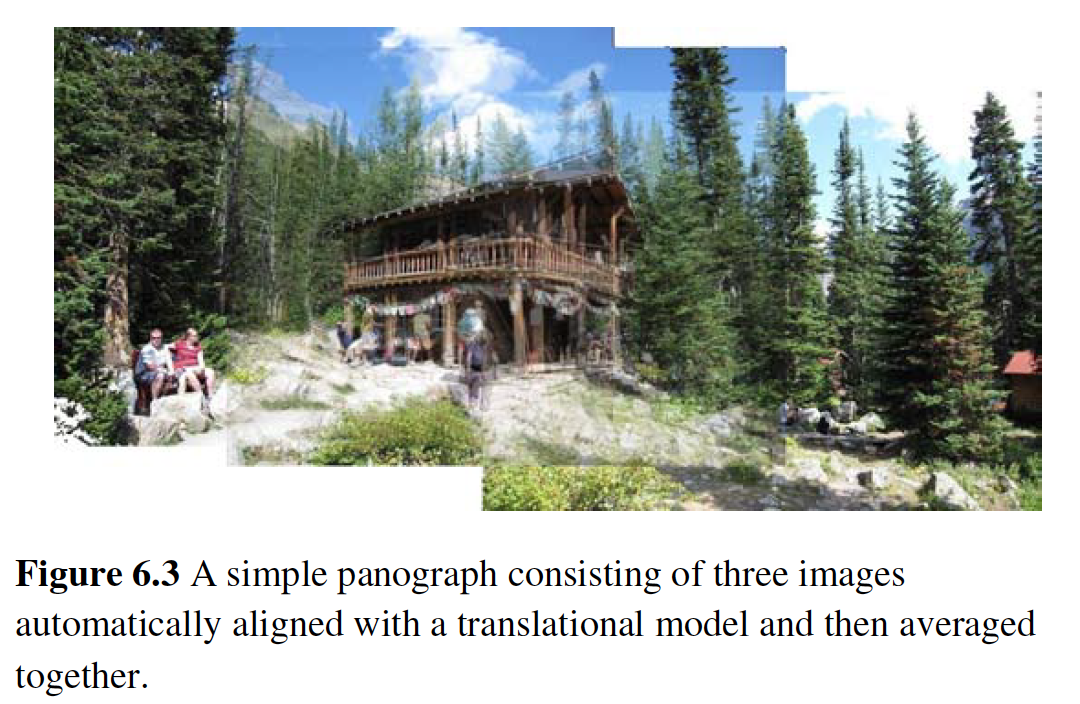

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Another application - 3D self location 
* See the images below -- observe the geometric transformation between the planar surfaces between the two views. What is the mathematical relationship between them? How can we match image regions between two images in a geometrically consistent manner? 

* Knowing this geometric relationship between surfaces in different image frames can help a UAV locate itself in 3D with respect to other objects. 

* To solve this problem, we have to start with understanding 2D geometric transformations of images.


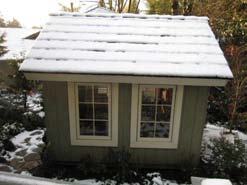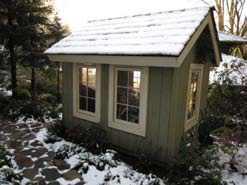

# Setting up the mapping as forward warp (or inverse warp)



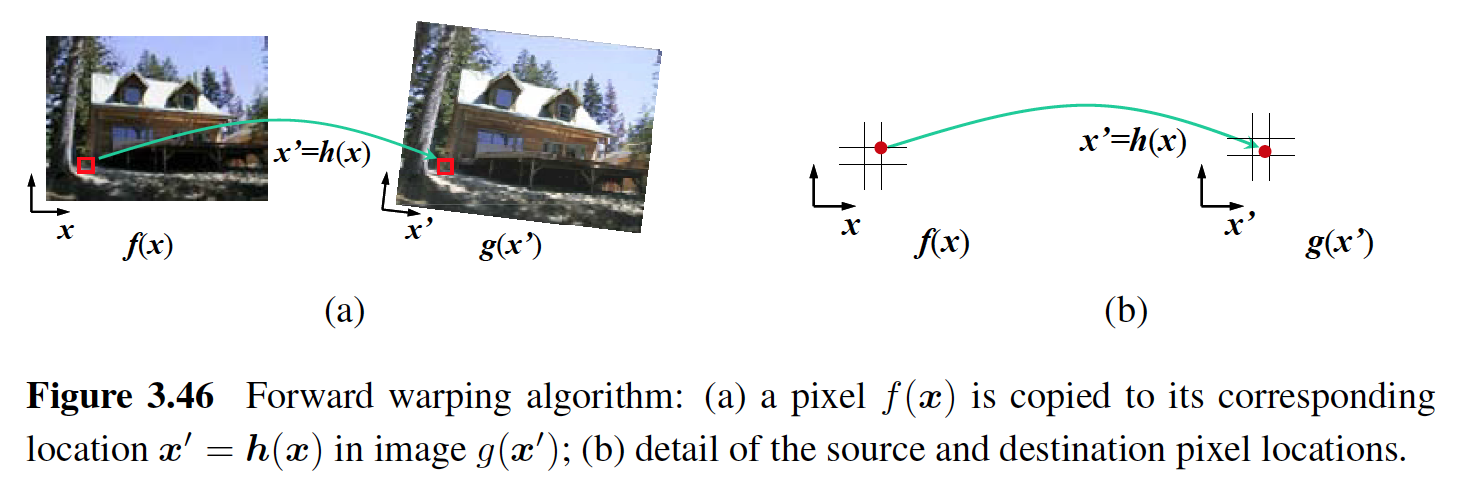

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Forward warping function

* Let $f$ be a given image, whose pixels are indexed as $f(x)$.

* We need to transform a pixel location $x$ in $f$ by a function $h$ so that the pixel's location in the new image is $h(x)$. 

* **Problem**: The process of copying a pixel $f(x)$ to a location $x'$ in $g(x)$ is not well defined when $x'$ has a non-integer value.

>> One solution: *splatting*: “distribute” the value among the four nearest neighbors in a weighted (bilinear) fashion, keeping track of the per-pixel weights and normalizing at the end.  

* However, this approach suffers from aliasing and a fair amount of blur (loss of high-resolution detail). 

* Also, cracks and holes appear when magnifying an image.

* **Solution**: Inverse warping.

## Inverse mapping (preferred)

* It is preferable to formulate the problem of image warping as that of resampling a source image $f(\mathbf{x})$ given a mapping $\mathbf{x} = h(\mathbf{x'})$ from destination pixels $\mathbf{x'}$ to source pixels $\mathbf{x}$.

* To compute the value of $f(\mathbf{x})$ at a non-integer location $\mathbf{x}$, we can employ bilinear interpolation among the neighboring pixels. For better results, there are many graphics methods. See Section 6.1.1 of your textbook for more ideas.

* No artifacts such as holes or cracks when magnifying an image!



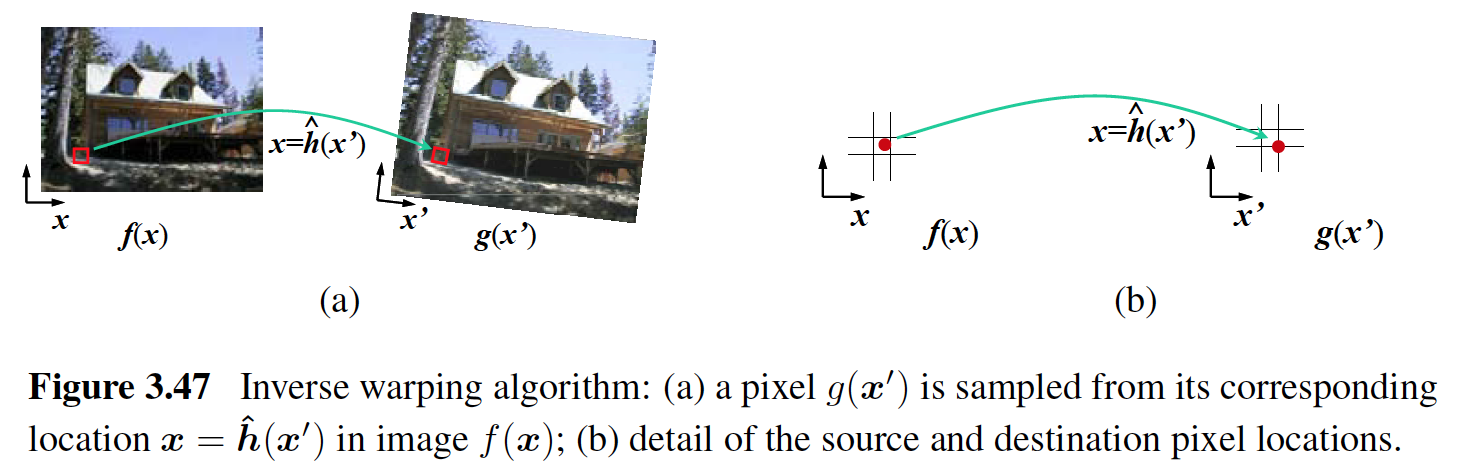

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

##Code: Setup Initialize

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from skimage.color import rgb2gray



np.set_printoptions(precision=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/'

!ls "$data_dir"

Mounted at /content/drive
 0005_Walking001.xlsx			     left01.jpg
 0008_ChaCha001.xlsx			     left02.jpg
 2011_09_26_drive_0048_sync		     left03.jpg
 2011_09_26_drive_0048_sync.zip		     left04.jpg
 20211003_082148.jpg			     left05.jpg
 20211003_082201.jpg			     left06.jpg
 apple.jpg				     left07.jpg
'Armes 1.png'				     left08.jpg
'Armes 2.png'				     left09.jpg
 blog_danforth_monica_mural_panorama.jpg     left11.jpg
 blog_monica_mural_brown_white.jpg	     left12.jpg
 blog_monica_mural_fish_tree_windows1.jpg    lizard.jpg
'cats and dogs.jpg'			     MOT16-08-raw.webm
 convenience-store-cereal01.jpg		     mountain_peak_1.png
 declaration_of_independence_stone_630.jpg   mountain_peak_2.png
 Fig3_3a.jpg				     parking_lot_meva_1.png
 Fig3_4a.jpg				     parking_lot_meva_2.png
 Fig3_4c.jpg				     parking_lot_meva_3.png
 hawaii.png				    'Road Signs Kaggle'
 house_1.png				     semper
 house_2.png				    'Superbowl 2021_1.png'
 house_facade.png			    'Superbowl 2021_2.png'
 IMG_01

## Code: `inverse_warp` 

<ipython-input-3-e9ef3dcb4e27>:34: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(img)


width= 124 height= 93


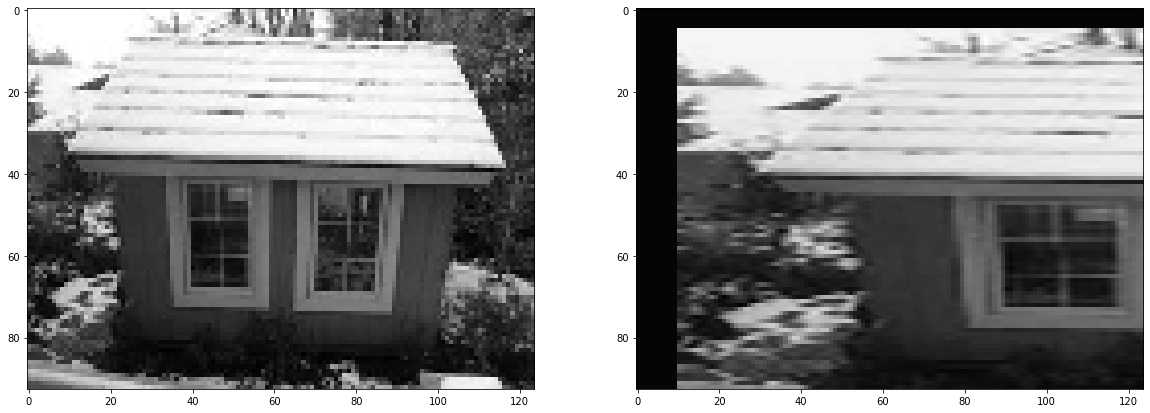

In [ ]:
from scipy import ndimage as scimage
# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
# https://www.scipy.org/

def h (x, y) :
    # h is a function that forward mapping function from f to g
    return (2*x+10, y+5)

def h_inv (x, y):
    # inh_h is the function that mapps from g to f
    return ((x-10)/2, y-5)

def inverse_warp (from_image_f, inv_h, output_shape) :
    # This function is similar in fuction to the warp function in scikit
    # The output image size is part of the input here.
    # inv_h is the function that mapps from g to f

    height_f, width_f = from_image_f.shape
    print('width=', width_f, 'height=', height_f)

    to_image_g = np.zeros(output_shape)

    # Second, find the pixel values in the output image using inverse map, h_inv
    for gx in range (output_shape[1]) :
        for gy in range (output_shape[0]) :
            fx, fy = inv_h(gx, gy)
            to_image_g[np.max(gy, 0), np.max(gx, 0)] = scimage.map_coordinates(from_image_f, [[fy], [fx]], order=3)
 
    return(to_image_g)

#--------------------------------------------------------------------------------
# Load an color image in grayscale
img = io.imread(data_dir+'house_1.png')
img = rgb2gray(img)
img = img[0:img.shape[0]:2, 0:img.shape[1]:2] # reduce image size to speed up processing

img = img.astype(float)  # need to change type from uint8 to float

out = inverse_warp (img, h_inv, img.shape)  #output image size is the same as the input

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');


# Mathematical preliminaries

You will learn about the mathematical formulation of the basic types of image transformations such as translation, rigid, similarity, affine, and projective.

See Section 2.1 of the textbook for this material

## Homogeneous coordinates of points

* A 2D points, $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$, is mapped to a 3D line through the origin given by 

\begin{equation}
\widetilde{\mathbf{x}} = w \begin{bmatrix}
        x \\ y\\ 1
    \end{bmatrix}
\end{equation}
    
* We can transform a 2D representation into a 3-dimensional representation and vice-versa. This 3D space is theoretical, not the 3D world we live in. We will study the fully 3D world model later. Here, we explore the 2D world through 3D theoretical representations.

* The use of homogeneous coordinates makes the representation of the transformations simpler, notation-wise. *Many transformations can be described as matrix multiplication, making it easier to represent a chain of transformations as simple matrix multiplications*.


## Homogeneous coordinates of 2D lines

* Equation of a 2D line can be written as $a x + b y + c = 0$ or as 

\begin{equation}
\begin{bmatrix}
        a & b & c
    \end{bmatrix}\begin{bmatrix}
        x \\ y \\ 1 
    \end{bmatrix} = 0 
\end{equation}
    
> > or as 

\begin{equation}
\widetilde{\mathbf{n}}^T \widetilde{\mathbf{x}} = 0,
\end{equation},

> > where $\widetilde{\mathbf{n}}$ is the homogeneous representation of a line. 

* Note that the homogeneous representation of a line is the same as a point. Scaled version of the homogeneous representation, $w \widetilde{\mathbf{n}}$ represents the same line, as $w a x + w b y + w c = w (a x + b y + c) = 0$

## Intersection

**Intersection of two 2D lines**

* In terms of homogeneous coordinates, the intersection of two lines is given by the **cross-product** of the line representations.

\begin{equation}
\widetilde{\mathbf{x}} = \widetilde{\mathbf{n_1}} \times \widetilde{\mathbf{n_2}}
\end{equation}

**Line joining two 2D points**

* The line joining two points is given by the **cross-product** of the two-point representations.

\begin{equation}
\widetilde{\mathbf{n}} = \widetilde{\mathbf{x_1}} \times \widetilde{\mathbf{x_2}}
\end{equation}

# Basic set of transformations

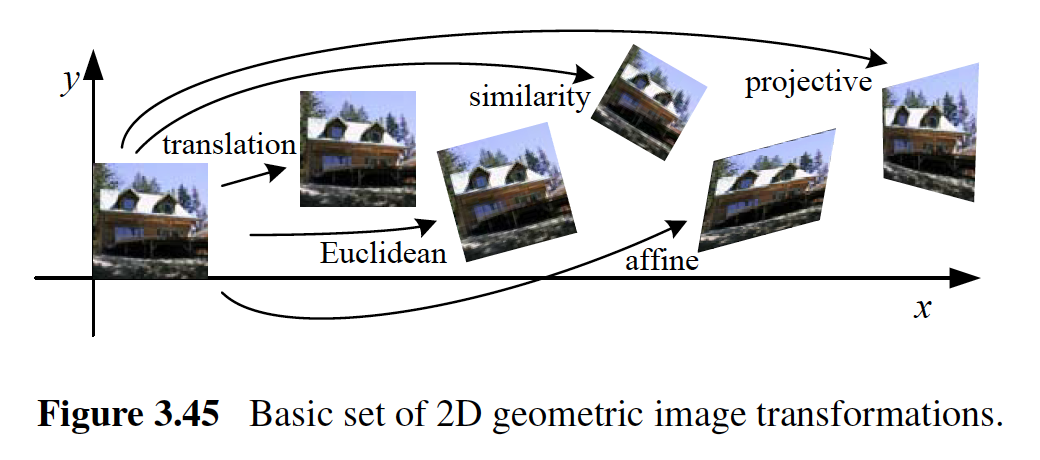

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

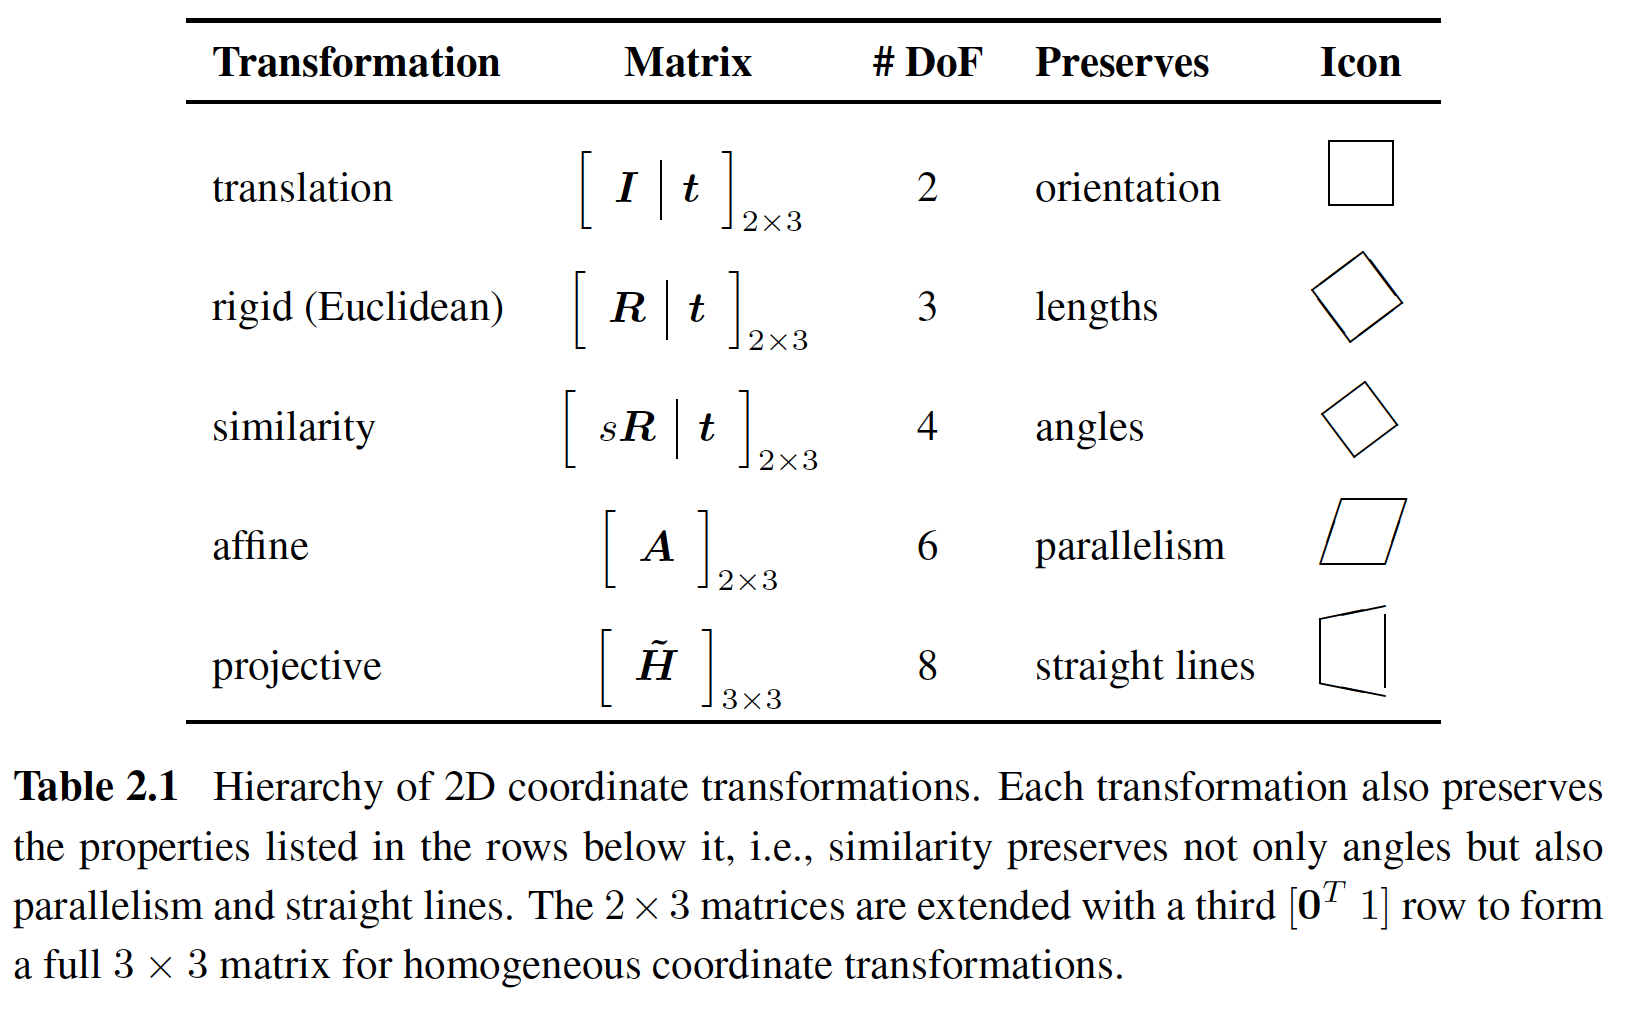

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Translation 

Just the translation transformation preserves orientation, angles, and length.
 
\begin{eqnarray}
        \mathbf{x}' & = & \mathbf{x} +\mathbf{t} \\
        \begin{bmatrix}
            x' \\ y' 
        \end{bmatrix} & = & \begin{bmatrix}
            x \\ y 
        \end{bmatrix} + \begin{bmatrix}
            t_x \\ t_y 
        \end{bmatrix} 
\end{eqnarray}

We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
        \begin{bmatrix}
            x' \\ y' \\ 1
        \end{bmatrix} & = & 
         \begin{bmatrix}
            1 & 0 & t_x \\
            0 & 1 & t_y \\
            0 & 0 & 1
        \end{bmatrix} 
        \begin{bmatrix}
            x \\ y \\ 1
        \end{bmatrix} \\
        \widetilde{\mathbf{x}'} & = & 
        \begin{bmatrix}
            \mathbf{I}^{2 \times 2} & \mathbf{t}^{2 \times 1} \\
            \mathbf{0}^{1 \times 2} & 1
        \end{bmatrix}
        \widetilde{\mathbf{x}}
\end{eqnarray}
    

## Rotation and translation

* A rotation and translation of an image patch preserves angles and length
    
    
\begin{eqnarray}
    \mathbf{x}' & = & \mathbf{R}^{2 \times 2}\mathbf{x} +\mathbf{t} \\ \\
    \begin{bmatrix}
        x' \\ y' 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        \cos(\theta) & - \sin (\theta) \\
        \sin (\theta) & \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y 
    \end{bmatrix} + \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} \\
\end{eqnarray}

* We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        \cos(\theta) & - \sin (\theta)& t_x \\
        \sin (\theta) & \cos (\theta) & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} \\ \\
    \widetilde{\mathbf{x}'} & = & 
    \begin{bmatrix}
        \mathbf{R}^{2 \times 2} & \mathbf{t}^{2 \times 1} \\
        \mathbf{0}^{1 \times 2} & 1
    \end{bmatrix}
    \widetilde{\mathbf{x}}
\end{eqnarray}
    
* The rotation matrix is not any $2 \times 2$ matrix. It has certain properties it has to satisfy: $\mathbf{R}\mathbf{R}^T = \mathbf{R}^T\mathbf{R} = \mathbf{I}$ and $\det (\mathbf{R}) = 1$. The columns and rows are orthogonal, and their magnitudes are one. In other words, the matrix is an **orthonormal** matrix.


* What would be the **inverse** relationship?
    
    
\begin{eqnarray}
    \mathbf{x}' & = & \mathbf{R}\mathbf{x} +\mathbf{t} \\ \\
    \mathbf{R}^{-1}\mathbf{x}' & = & \mathbf{x} + \mathbf{R}^{-1} \mathbf{t}
    \text{     (multiplying both sides by inverse of rotation matrix)}\\ \\
    \mathbf{x} & = & \mathbf{R}^{T}\mathbf{x}' - \mathbf{R}^{T} \mathbf{t} 
    \text{     (rearranging and using $\mathbf{R}^{-1} = \mathbf{R}^{T}$)}\\ \\
    \begin{bmatrix}
        x \\ y
    \end{bmatrix} & = & 
    \begin{bmatrix}
        \cos(\theta) &  \sin (\theta) \\
        -\sin (\theta) & \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        x' \\ y' 
    \end{bmatrix} + \begin{bmatrix}
        -\cos(\theta) t_x - \sin (\theta) t_y \\ \sin(\theta) t_x - \cos(\theta) t_y 
    \end{bmatrix} \\
\end{eqnarray}




### Code: Rotation

Verifying the specification of the inverse matrix is okay. The below should be an identity matrix
 [[ 1.0e+00 -4.1e-17  0.0e+00]
 [-4.0e-17  1.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  1.0e+00]]
width= 124 height= 93


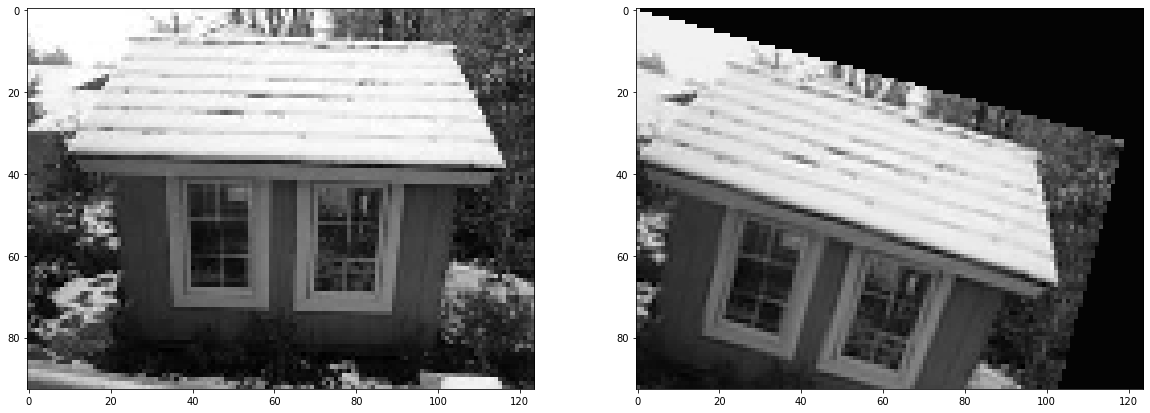

In [ ]:
theta = 15*np.pi/180
t = np.array([[0],[0]])

Rt = np.array([[np.cos(theta), - np.sin(theta), t[0, 0]],
               [np.sin(theta),   np.cos(theta), t[1, 0]],
               [0            , 0              ,  1 ]]) 


Rt_inv = np.linalg.inv (Rt) 

# Test if the above inverse works by computing Rt @ Rt_inv

print ('Verifying the specification of the inverse matrix is okay. The below should be an identity matrix\n', Rt @ Rt_inv)

# defining the mapping functions using homogenous coordinates
def h (x, y) :
    out = Rt @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y): 
    out = Rt_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

#-------------------------------------------------------------------------------
out = inverse_warp (img, h_inv, img.shape)
#-------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

##Rotation about image center

* As you can observe, the rotation is about the image's top-left corner, i.e., the pixel at location (0, 0).

* How would you modify the transformation so that the rotation is about the **middle** of the image?

* The key is to use the correct translation vector. You can experiment using different translations in the code above and see the effect on the output. Here we will derive the exact translation vector needed.

* **Notice that the center of rotation is invariant to rotation, i.e., the center maps itself. This is the critical observation we will exploit.**

* Let the center of the image be $(c_x, c_y)$. The invariant mapping of the center is mathematically expressed as:

\begin{eqnarray}
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        \cos(\theta) & - \sin (\theta) \\
        \sin (\theta) & \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix} 
    + \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} \\
\end{eqnarray}

* Rearranging the above terms, the expression for the translation for rotation around the center is:

\begin{eqnarray}
    \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        c_x \\ c_y  
    \end{bmatrix} - 
    \begin{bmatrix}
        \cos(\theta) & - \sin (\theta) \\
        \sin (\theta) & \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix}  \\ \\
    & = &
       \left [
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix} -
    \begin{bmatrix}
        \cos(\theta) & - \sin (\theta) \\
        \sin (\theta) & \cos (\theta)
    \end{bmatrix} 
    \right ]
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix}
\end{eqnarray}



### Code: Rotation (about center)

Verifying the specification of the inverse matrix is okay. The below should be an identity matrix
 [[ 1.00e+00 -7.44e-18  0.00e+00]
 [ 4.06e-17  1.00e+00  3.55e-15]
 [ 0.00e+00  0.00e+00  1.00e+00]]
width= 124 height= 93


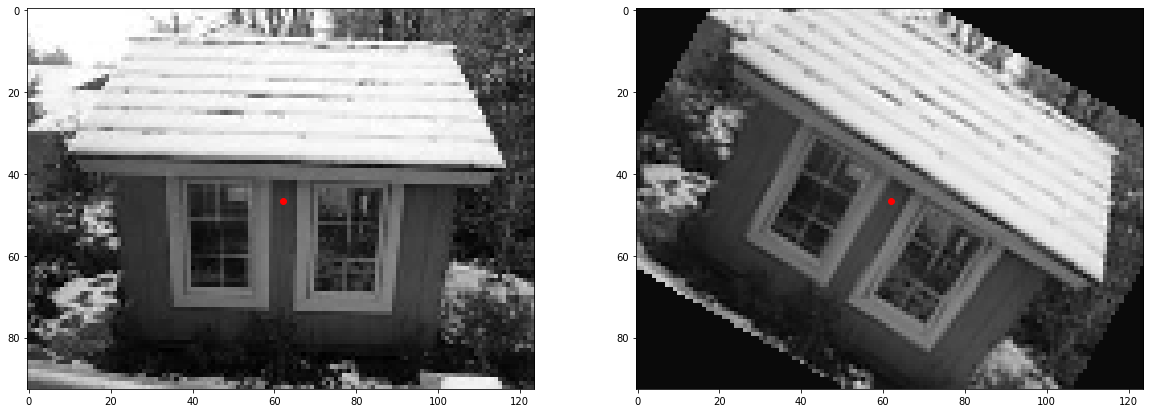

In [ ]:
theta = 30*np.pi/180
cy, cx = img.shape
cx = cx/2
cy = cy/2

t = np.array([[(1 - np.cos(theta))*cx + np.sin(theta) * cy],
              [-np.sin(theta)*cx + (1 - np.cos(theta)) * cy]])

#-------------------------------------------------------------------------------
Rt = np.array([[np.cos(theta), - np.sin(theta), t[0, 0]],
               [np.sin(theta),   np.cos(theta), t[1, 0]],
               [0            , 0              ,  1 ]]) 

Rt_inv = np.linalg.inv (Rt) 

# Test if the above inverse works by computing Rt @ Rt_inv

print ('Verifying the specification of the inverse matrix is okay. The below should be an identity matrix\n', Rt @ Rt_inv)

# defining the mapping functions using homogenous coordinates
def h (x, y) :
    out = Rt @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y): 
    out = Rt_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

#-------------------------------------------------------------------------------
out = inverse_warp (img, h_inv, img.shape)
#-------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray'), axs[0].plot(cx, cy,'ro')
axs[1].imshow(out, 'gray'), axs[1].plot(cx, cy,'ro');

## Similarity Transformation 

* If we allow for scaling, rotation, and translation, we will preserve only angles.
    
\begin{eqnarray}
    \mathbf{x}' & = & s \mathbf{R}\mathbf{x} +\mathbf{t} \\
    \begin{bmatrix}
        x' \\ y' 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        s \cos(\theta) & - s \sin (\theta) \\
        s \sin (\theta) & s \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y 
    \end{bmatrix} + \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} 
\end{eqnarray}

* We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
    \begin{bmatrix}
       x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        s \cos(\theta) & - s \sin (\theta)& t_x \\
        s \sin (\theta) & s \cos (\theta) & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} \\
    \widetilde{\mathbf{x}'} & = & 
    \begin{bmatrix}
        \begin{bmatrix}
            a & -b \\
            b & a
        \end{bmatrix} & \mathbf{t}^{2 \times 1} \\
        \mathbf{0}^{1 \times 2} & 1
    \end{bmatrix}
    \widetilde{\mathbf{x}}
\end{eqnarray}
    
* Note that unlike for a rotation matrix: $a^2 + b^2 \neq 1$.

* The similarity transformation about the center of the image can be derived in the manner that we adopted for rotation. Impose the constraint that the center of the image remains preserved and figure out the needed translation.

\begin{eqnarray}
    \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} 
    & = &
    \begin{bmatrix}
        1 - s \cos(\theta) &  s \sin (\theta) \\
        - s \sin (\theta) & 1 - s \cos (\theta)
    \end{bmatrix} 
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix}
\end{eqnarray}

### Code: Similarity (about center)

width= 124 height= 93


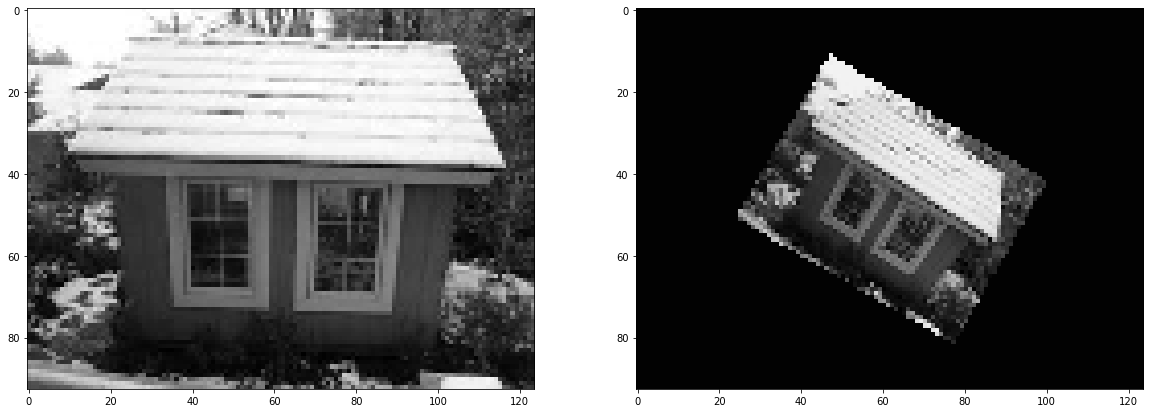

In [ ]:
theta = 30*np.pi/180
s = 0.5
cy, cx = img.shape
cx = cx/2
cy = cy/2

t = np.array([[(1 - s*np.cos(theta))*cx + s*np.sin(theta) * cy],
              [-s*np.sin(theta)*cx + (1 - s*np.cos(theta)) * cy]])

#-------------------------------------------------------------------------------
Rt = np.array([[s*np.cos(theta), - s*np.sin(theta), t[0, 0]],
               [s*np.sin(theta),   s*np.cos(theta), t[1, 0]],
               [0            , 0              ,  1 ]]) 

Rt_inv = np.linalg.inv (Rt) 


# defining the mapping functions using homogenous coordinates
def h (x, y) :
    out = Rt @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y): 
    out = Rt_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h_inv, img.shape)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Affine

* An affine transformation preserves only parallelism and changes orientation, angles, and lengths.
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        a_{00} & a_{01} & t_x \\
        a_{10} & a_{11} & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} 
\end{eqnarray} 

* Note that the "rotation" part of the transformation is relaxed to be any possible $2 \times 2$ matrix.

* The expression for the affine transformation about the center of the image can be derived in the manner we adopted for rotation. Impose the constraint that the center of the image remains preserved and figure out the needed translation.

\begin{eqnarray}
    \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} 
    & = &
    \begin{bmatrix}
        1 - a_{00} &   - a_{01} \\
        - a_{10} & 1 - a_{11}
    \end{bmatrix} 
    \begin{bmatrix}
        c_x \\ c_y 
    \end{bmatrix}
\end{eqnarray}

### Code: Affine (about center)

width= 124 height= 93


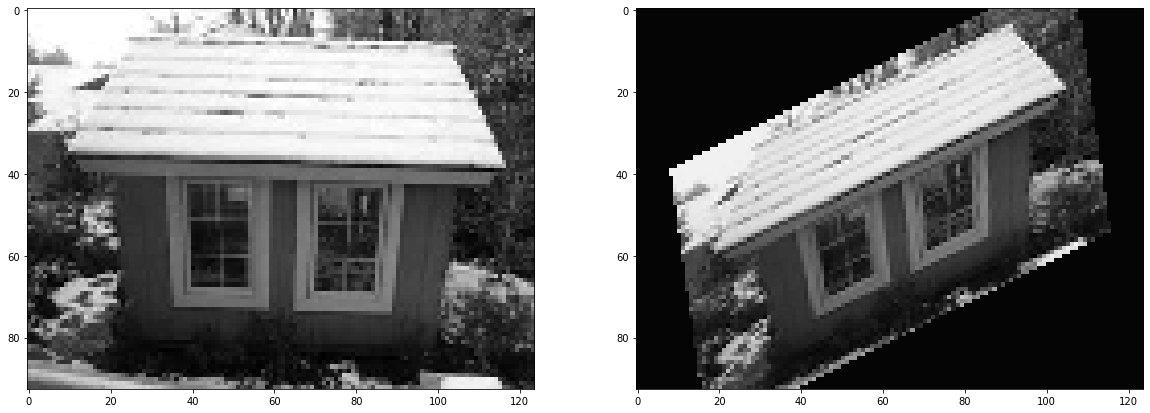

In [ ]:
#a = np.array([[0.8, 0], [0, 0.7]])
#a = np.array([[0.8, 0.1], [0.1, 0.7]])
#a = np.array([[0.8, -0.1], [0.1, 0.7]])
a = np.array([[0.8, 0.1], [-0.4, 0.7]])
#a = np.array([[0.8, -0.4], [0.2, 0.7]])


cy, cx = img.shape
cx = cx/2
cy = cy/2

t = np.array([[(1 - a[0,0])*cx - a[0,1] * cy],
              [-a[1,0]*cx + (1 - a[1,1]) * cy]])

#-------------------------------------------------------------------------------
Rt = np.array([[a[0,0], a[0,1], t[0, 0]],
               [a[1,0],  a[1,1], t[1, 0]],
               [0        , 0     ,  1 ]]) 

Rt_inv = np.linalg.inv (Rt) 


# defining the mapping functions using homogenous coordinates
def h (x, y) :
    out = Rt @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y): 
    out = Rt_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

#-------------------------------------------------------------------------------   
out = inverse_warp (img, h_inv, img.shape)
#-------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Stretch and squash

These transformations are restricted forms of the affine transformation.
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        a_{00} & 0 & t_x \\
        0 & a_{11} & t_y \\
        0 & 0 & 1
    \end{bmatrix}  
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  
\end{eqnarray} 

### Code: Stretch and squash (about center)

width= 124 height= 93


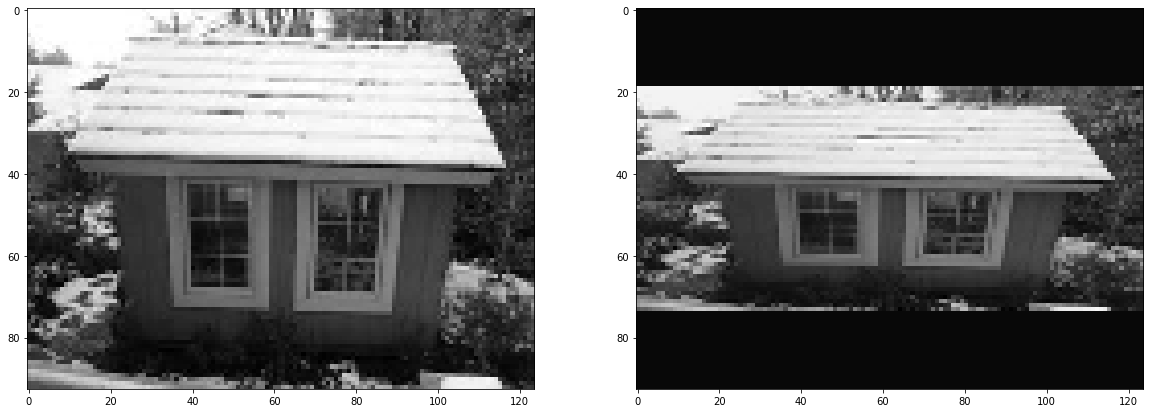

In [ ]:
a = np.array([[1.0, 0], [0, 0.6]])

cy, cx = img.shape
cx = cx/2
cy = cy/2

t = np.array([[(1 - a[0,0])*cx - a[0,1] * cy],
              [-a[1,0]*cx + (1 - a[1,1]) * cy]])

#-------------------------------------------------------------------------------
Rt = np.array([[a[0,0], a[0,1], t[0, 0]],
               [a[1,0],  a[1,1], t[1, 0]],
               [0        , 0     ,  1 ]]) 

Rt_inv = np.linalg.inv (Rt) 


# defining the mapping functions using homogenous coordinates
def h (x, y) :
    out = Rt @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y): 
    out = Rt_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

#-------------------------------------------------------------------------------   
out = inverse_warp (img, h_inv, img.shape)
#-------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');



## Projective

* This transformation, commonly used in computer vision, preserves only straight lines, i,e. straight lines get matched to straight lines, but other properties are not maintained, including parallelism. This relationship is the geometric model relating two perspective views of a plane. We will study this later.
    
\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ c
    \end{bmatrix} & = & 
        \begin{bmatrix}
        h_{00} & h_{01} & h_{02}\\
        h_{10} & h_{11} & h_{12} \\
        h_{20} & h_{21} & h_{22}
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  \\
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}} \\
    \mathbf{x} & = & \begin{bmatrix}
        a/c \\ b/c
    \end{bmatrix}
\end{eqnarray} 
    
* Lines are also transformed into lines by a **homography**. We can derive a similar relationship for other transformations.
    
\begin{eqnarray}
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}}   \\
    \widetilde{\mathbf{x}} & = & \widetilde{\mathbf{H}}^{-1} \widetilde{\mathbf{x}'}  \\
    \widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{x}} & = & 0 \\
    \widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{H}}^{-1} \widetilde{\mathbf{x}'} & = & 0 \\
    (\widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{H}}^{-1}) \widetilde{\mathbf{x}'} & = & 0 \\
    (\widetilde{\mathbf{H}}^{-T}\widetilde{\mathbf{n}} )^{T} \widetilde{\mathbf{x}'} & = & 0 \\
    \widetilde{\mathbf{n}'} & = & (\widetilde{\mathbf{H}}^{-T}\widetilde{\mathbf{n}} )
\end{eqnarray}

### Code: Projective

width= 124 height= 93


<ipython-input-9-850bdba5f8b0>:12: RuntimeWarning: divide by zero encountered in true_divide
  return(out[0]/out[2], out[1]/out[2])


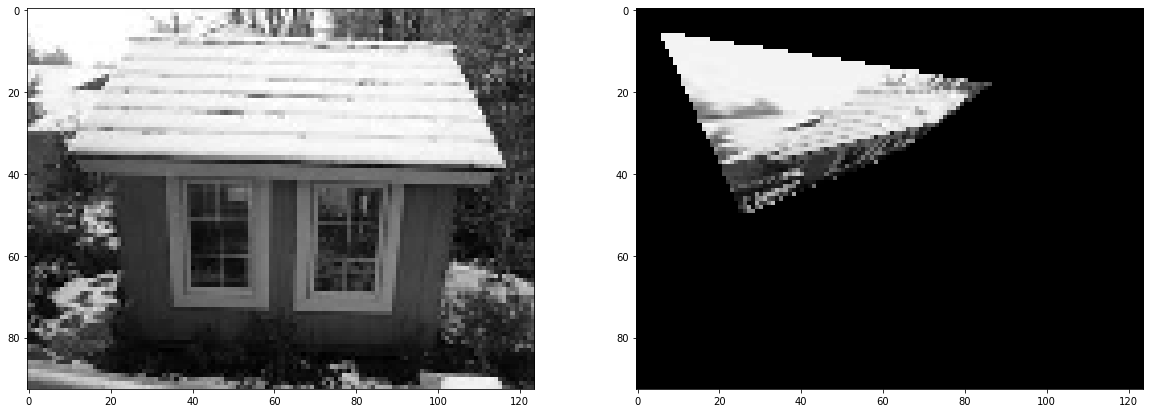

In [ ]:
# Different possibiliies for H
H = np.array([[1.0,  0.3,  1], 
              [0.2,  0.6,  1], 
              [0.01, 0.01, 0.2]])


H_inv = np.linalg.inv(H)


def h_inv (x, y): 
    out = H_inv @ np.array([[x],[y],[1]])   
    return(out[0]/out[2], out[1]/out[2])

out = inverse_warp (img, h_inv, img.shape)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

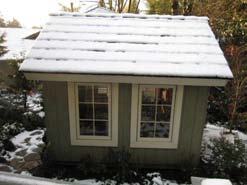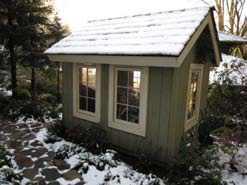

# ASSIGNMENT: Geometric Transformation

Consider the above two images of a shed and focus just on the roof. Which of the transformations studied (rotation, affine, similarity, perspective, shear, squash) would map the pixels on one of the roof onto the other? Explain your choice.


# ADVANCED MATERIAL 

**The rest of the material in this notebook is advanced content that is not part of the first level computer vision course. You can learn from this based on your own interest and backhground. You will not be tested on this material.**

## Lens distortion

* See Fig. 2.13 on page 59 of pdf for examples of lens distortions. 

* Mathematically, the simplest radial distortion models can be expressed using low-order polynomials. What is the relationship between lens distorted coordinates $(\hat{x}_c, \hat{y}_c)$ and undistorted coordinates $(x_c, y_c)$? 
    
\begin{equation} 
\begin{bmatrix} \hat{x}_c \\  \hat{y}_c \end{bmatrix} =
\begin{bmatrix} 
x_c (1 + \kappa_1 r^2 + \kappa_2 r^4) \\
y_c (1 + \kappa_1 r^2 + \kappa_2 r^4)
\end{bmatrix}
\end{equation}

* The coordinates $(x_c, y_c)$  and the radius $r$ are defined with respect to the center of the image. 

* Inverse is complicated to compute. No explicit inverse function exists. Iterative stratgies are typically used to approximate the inverse map, hence can be slow for all pixels of an image.

* Let $ \hat{r} = \sqrt{\hat{x}_c^2 + \hat{y}_c^2}$

* Note $ \hat{r}^2 = \hat{x}_c^2 + \hat{y}_c^2   = (x_c^2 + y_c^2) (1 + \kappa_1 r^2 + \kappa_2 r^4)^2 =  r^2 (1 + \kappa_1 r^2 + \kappa_2 r^4)^2$

* We have $ \hat{r} = r (1 + \kappa_1 r^2 + \kappa_2 r^4) $

* Our goal is to find $r = f^{-1}(\hat{r})$. 

* Then $x_c = \hat{x}_c \frac{r}{\hat{r}}$ and $y_c = \hat{y}_c  \frac{r}{\hat{r}}$

* $ r = \frac{\hat{r}}{(1 + \kappa_1 r^2 + \kappa_2 r^4)} $, here $\hat{r}$ is known, we have to find $r$

* We can setup an iterative solution strategy. Start with an initial estimate of $r_0 = \hat{r}$ and then iterate until convergence.

\begin{equation}
 r_{n+1} = \frac{\hat{r}}{(1 + \kappa_1 r_n^2 + \kappa_2 r_n^4)} 
\end{equation}

* Repeat the above for each pixel.






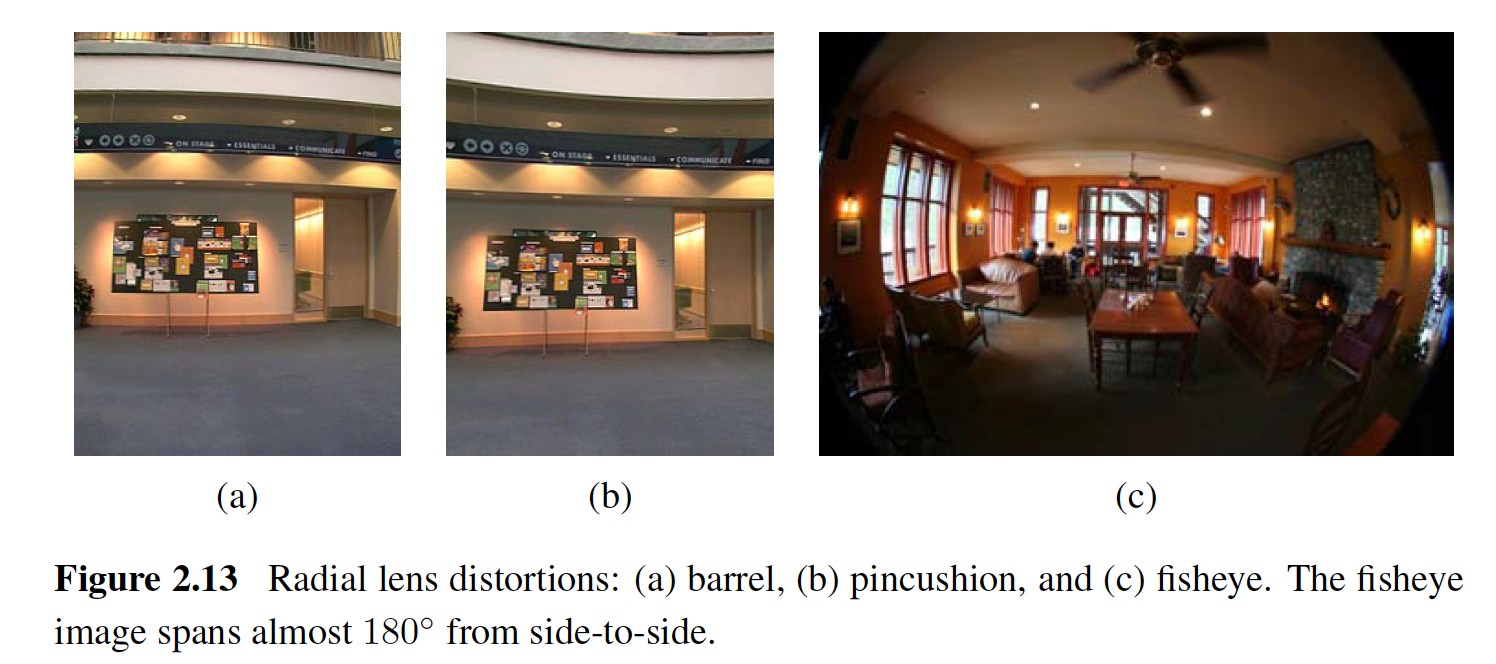

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Code: Lens Distortion

Center:  62.0 46.5
width= 124 height= 93


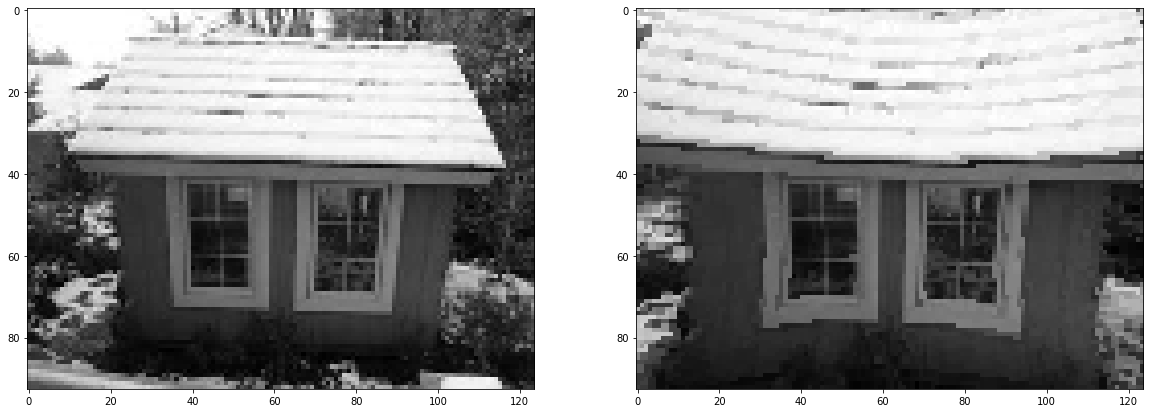

In [ ]:
kappa_1 = 0.00014
kappa_2 = 0 #0.00000012
c_x = 0
c_y = 0


def h (x, y) :
    global c_x, c_y, kappa_1, kappa_2
    x = x - c_x 
    y = y - c_y
    r_sq = np.power(x, 2) + np.power(y, 2)
    distortion_factor = 1 + kappa_1*r_sq + kappa_2*r_sq*r_sq
    x_h = x * distortion_factor + c_x
    y_h = y * distortion_factor + c_y

    return(np.round(x_h), np.round(y_h))

def h_inv (x_h, y_h):
    global c_x, c_y, kappa_1, kappa_2

    x_h = x_h - c_x
    y_h = y_h - c_y 

    r_h = np.sqrt(np.power(x_h, 2) + np.power(y_h, 2))
    if r_h == 0 :
        return (c_x, c_y)
    else:
        r_now = 9999.0
        r_next = r_h
        while (np.abs(r_next - r_now) > 0.01) :
            r_now = r_next
            distortion_factor = 1 + kappa_1* np.power(r_now, 2) + kappa_2*np.power(r_now, 4)
            r_next = r_h/distortion_factor
            #print(r_now, r_next)

        x = x_h*r_next/r_h + c_x
        y = y_h*r_next/r_h + c_y
        return(np.round(x), np.round(y))

c_y, c_x = img.shape
c_x = c_x/2; c_y = c_y/2
print('Center: ', c_x, c_y)

out = inverse_warp (img, h_inv, img.shape)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Transformation Groups

A (mathematical) [group](https://www.mathsisfun.com/sets/groups-introduction.html) is a set (points in 2D in our case) together with an operation (one of the geometric transformations we have studied above) and exhibit the four properties: closure, associativity, identity and invertibility.

The geometric transformations that we have studied (with some restrictions on degenerate values) along with the set of 2D points form closed groups. In fact, they form a nested set of groups.  Which transformations exhibit this property?
    
1. Rigid transformations form a group as it is invertible. 

2. Not all affine and projective are invertible. If we restrict these transformations to be invertible then they form groups. 

3. They all have the other three properties. 

## Notation Conventions

We will use the following notation to generically represent these transformations.

\begin{equation}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p})
\end{equation}

where $\mathbf{p}$ is the set of parameters to be estimated. Note that the range of this function is vector valued and the domain of the function is also vector-valued.
    
For numerical convenience of choosing initialization, we usually reparameterize the transformations so that when the parameters, $\mathbf{p}$, are all zero, i.e., the point does not move. To achieve this we add a 1 to the first two diagonal values of the transformation matrix. See Table 6.1

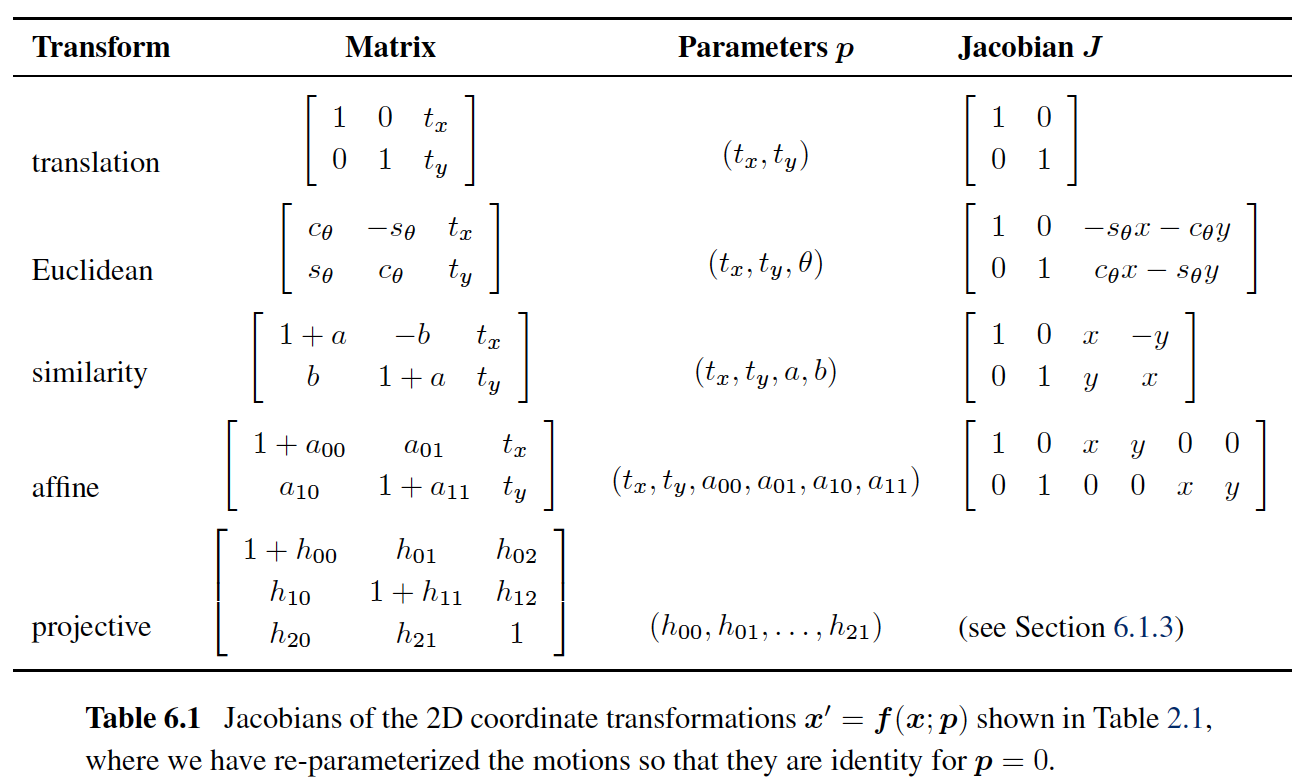

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## What is Jacobian?

* The quantity Jacobian is named are [Carl Gustav Jacob Jacobi](https://en.wikipedia.org/wiki/Carl_Gustav_Jacob_Jacobi).

* A Jacobian, denoted by $\mathbf{J}$, is the derivative of a vector-valued function, such as the transformation functions that we have $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p})$, with respect to the parameters, $\mathbf{p}$. It is a matrix of first derivatives that will be used in the estimation process. 

* The Jacobian matrix in our case *could* be function of both ${\mathbf{x_i}}$ and $\mathbf{p}$, which can be explicitly denoted using $J (\widetilde{\mathbf{x_i}}; \mathbf{p})$. If the Jacobian is a function of the parameters, $\mathbf{p}$, then we have a **non-linear estimation problem** at hand, and we will need an interactive estimation process. If the Jacobian is not a function of the parameters, $\mathbf{p}$, then we have a **linear estimation problem** and can have the solution in closed form, in one-shot. Note that this concept of linearity is different from the transformation itself is linear or non-linear. The function linearity and estimation linearity are two different concepts.

* This Jacobian will be an $d \times n$ matrix, where the number of dimensions is d and the number of parameters is $n$. The $ij$-th entry of this matrix  $J_{ij} = \frac{\partial f_i}{\partial p_j}$.

\begin{equation}
\mathbf{J} = 
\begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial p_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial p_{n}} 
    \end{bmatrix}
= \begin{bmatrix}
    \nabla^T f_1 \\  
    \vdots \\
    \nabla^T f_d   
    \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_d}{\partial x_1} & \cdots & \dfrac{\partial f_d}{\partial x_n} \end{bmatrix}
\end{equation}
    

## Jacobian for Translation

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix}  & = & 
    \begin{bmatrix}
        1 & 0 & t_x \\
        0 & 1 & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix} 
\end{eqnarray}
   
The parameter vector is two dimensional and is given by  
$\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y 
\end{bmatrix}$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by
   
\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & 
    \frac{\partial}{\partial \mathbf{p}} \mathbf{f}(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & 
    \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y \\
    \end{bmatrix} \\
    & = & 
    \begin{bmatrix}
        1 & 0  \\
        0 & 1 
    \end{bmatrix}
\end{eqnarray} 

## Jacobian for Euclidean (rigid motion) 2D rotation + translation

2D rigid motion is characterized by a 2D rotation matrix and a translation vector.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        \cos \theta & - \sin \theta & t_x \\
        \sin \theta & \cos \theta & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}
   
The parameter vector is three dimensional and is given by  $\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y \\ \theta
\end{bmatrix}$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by
   
\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & \frac{\partial}{\partial \mathbf{p}} f(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & 
    \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x & 
        \frac{\partial}{\partial \theta} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y & 
        \frac{\partial}{\partial \theta} f_y \\
    \end{bmatrix}  \\
    & = & 
    \begin{bmatrix}
        1 & 0 & (-\sin(\theta) x_i - \cos(\theta) y_i) \\
        0 & 1 & (\cos(\theta) x_i - \sin(\theta) y_i)
    \end{bmatrix}
\end{eqnarray} 
    
Note that the Jacobian is a function of the parameter, $\theta$ and the derivative of the residual will not yield a linear equation from which we can derive a closed form solution. Unlike for the translation case, there is no linear inversion process to estimate the parameters for rigid motion. 

## Jacobian for Similarity Transformation Estimation 

The similarity transformation is comprised of a compress and strech plus translation.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        1+a & - b & t_x \\
        b & 1+a & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}

The parameter vector is four dimensional 
$\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y \\ a \\ b
\end{bmatrix}$. 

Note that we have parameterized the transformation in such a way that $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}=0) = \widetilde{\mathbf{x_i}}$ or $\mathbf{p}=0$ results in an identity transformation.



The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i)}$ is given by
\begin{equation}
    \mathbf{J(\mathbf{x_i})} = \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x & 
        \frac{\partial}{\partial a} f_x & 
        \frac{\partial}{\partial b} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y & 
        \frac{\partial}{\partial a} f_y & 
        \frac{\partial}{\partial b} f_y \\
    \end{bmatrix}  = \begin{bmatrix}
        1 & 0 & x_i & -y_i \\
        0 & 1 & y_i & x_i
    \end{bmatrix}
\end{equation}

Note that this Jacobian is not a function of the function parameters, so we can have a linear estimate for it.

## Jacobian for Affine Transformation

The affine transformation is further generalized version of the similarity transform.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        1+a_{00} & a_{01} & t_x \\
        a_{10} & 1+a_{11} & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}

The parameter vector is four dimensional 
$\mathbf{p} = 
\begin{bmatrix}
    a_{00} \\ a_{01} \\ t_x \\ a_{10} \\ a_{11} \\ t_y
\end{bmatrix}$. 

Like earlier, we have parameterized the transformation in such a way that $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}=0) = \widetilde{\mathbf{x_i}}$ or $\mathbf{p}=0$ results in an identity transformation.



The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i)}$ is given by


\begin{eqnarray}
    \frac{\partial}{\partial \mathbf{p}} f (\widetilde{\mathbf{x_i}}; \mathbf{p}) & = & 
\begin{bmatrix}
        \frac{\partial}{\partial a_{00}} f_x & 
        \frac{\partial}{\partial a_{01}} f_x & 
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial a_{10}} f_x &
        \frac{\partial}{\partial a_{11}} f_x &
        \frac{\partial}{\partial t_y} f_x \\
        \frac{\partial}{\partial a_{00}} f_y & 
        \frac{\partial}{\partial a_{01}} f_y & 
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial a_{10}} f_y &
        \frac{\partial}{\partial a_{11}} f_y &
        \frac{\partial}{\partial t_y} f_y
        \end{bmatrix}  \\
    & = & 
\begin{bmatrix}
    x_i & y_i & 1 & 0     & 0 & 0\\
    0   & 0   & 0 & x_i & y_i & 1
\end{bmatrix}
\end{eqnarray}

Note that like the similarity transform the components of the Jacobian do not involve the parameters being estimated. Because of this property, we would be able to solve this particular problem in a non-iterative fashion, i.e. there is a closed form expression of the solution.

## Jacobian for 2D Perspective Transform
    
Recall that the transformation can be represented as 
    
\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ c
    \end{bmatrix} & = & 
    \begin{bmatrix}
        h_{00} & h_{01} & h_{02}\\
        h_{10} & h_{11} & h_{12} \\
        h_{20} & h_{21} & h_{22}
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  \\
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}} \\
    \mathbf{x}' = 
    \begin{bmatrix} 
    x' \\ y' 
    \end{bmatrix}
    & = & 
    \begin{bmatrix}
        a/c \\ b/c
    \end{bmatrix}
\end{eqnarray} 
    
Note that scaling of the transformation matrix, $\widetilde{\mathbf{H}} $, results in the same point $\mathbf{x}'$. This means that the transformation matrix can be known only up to a scale. Another aspect of this is that there are infinite number of solutions. To constrain the solution space, we can one of the parameters of the transformation matrix to a constant value. Typically, this is $h_{22}$, which is set to 1.  This, along with reparameterization of the transformation so that $\mathbf{p} = \mathbf{0}$ is the identity transformation, we arrive at the following effective representation of the transformation.

\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ D
    \end{bmatrix} & = & 
    \begin{bmatrix}
        1+h_{00} & h_{01} & h_{02}\\
        h_{10} & 1+h_{11} & h_{12} \\
        h_{20} & h_{21} & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}  \\
    \mathbf{\hat{x}}' = \begin{bmatrix} \hat{x}_i' \\ \hat{y}_i' \end{bmatrix}
    & = & 
    \begin{bmatrix}
        a/D \\ b/D
    \end{bmatrix}
\end{eqnarray} 
    
    
The parameter vector is eight dimensional and is given by  $\mathbf{p} = \begin{bmatrix}
    h_{00} & h_{01} & \cdots & h_{21}
\end{bmatrix}^T$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by

\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & \frac{\partial}{\partial \mathbf{p}} f(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & \begin{bmatrix}
            \frac{\partial}{\partial h_{00}} \hat{x}_i' & 
            \frac{\partial}{\partial h_{01}} \hat{x}_i' & \cdots & \frac{\partial}{\partial h_{21}} \hat{x}_i' \\
            \frac{\partial}{\partial h_{00}} \hat{y}_i' & 
            \frac{\partial}{\partial h_{01}} \hat{y}_i' & \cdots & \frac{\partial}{\partial h_{21}} \hat{y}_i' \\
    \end{bmatrix} 
\end{eqnarray} 

\begin{eqnarray}
\hat{x}_i' & = & \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{h_{20} x_i + h_{21} y_i + 1} \\
\hat{y}_i' & = & \frac{(1+h_{10}) x_i + h_{11} y_i + h_{12}}{h_{20} x_i + h_{21} y_i + 1} \\
\end{eqnarray}

Note $\frac{\partial \hat{x}_i'}{\partial h_{10}} = \frac{\partial \hat{x}_i'}{\partial h_{11}} = \frac{\partial \hat{x}_i'}{\partial h_{12}} = 0$, as $\hat{x}_i'$ does not depend on these parameters. Similarly, $\frac{\partial \hat{y}_i'}{\partial h_{00}} = \frac{\partial \hat{y}_i'}{\partial h_{01}} = \frac{\partial \hat{y}_i'}{\partial h_{02}} = 0$.

For ease of notation, let us use $D$ to represent the denominator,  $h_{20} x_i + h_{21} y_i + 1$. Then, $\frac{\partial \hat{x}_i'}{\partial h_{00}} = \frac{x_i}{D}$, $\frac{\partial \hat{x}_i'}{\partial h_{01}} = \frac{y_i}{D}$, and $\frac{\partial \hat{x}_i'}{\partial h_{02}} = \frac{1}{D}$.

And,
\begin{eqnarray}
     \frac{\partial \hat{x}_i'}{\partial h_{20}} & = & - \frac{x_i}{D^2} ( (1+h_{00}) x_i + h_{01} y_i + h_{02}) \\
     & = & - \frac{x_i}{D} \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{D} \\
     & = & - \frac{x_i \hat{x}_i'}{D}
\end{eqnarray}

\begin{eqnarray}
     \frac{\partial \hat{x}_i'}{\partial h_{21}} & = & - \frac{y_i}{D^2} ( (1+h_{00}) x_i + h_{01} y_i + h_{02}) \\
     & = & - \frac{y_i}{D} \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{D} \\
     & = & - \frac{y_i \hat{x}_i'}{D}
\end{eqnarray}

The Jacobian for projective transformation (homography) is given by 

\begin{equation}
    J(\mathbf{x_i}; \mathbf{p}) = \frac{1}{D}
\begin{bmatrix}
    x_i & y_i & 1 & 0 & 0 & 0 & - x_i \hat{x}_i' & - y_i \hat{x}_i'\\
    0 & 0 & 0 & x_i & y_i & 1  & - x_i \hat{y}_i'  & - y_i \hat{y}_i'
\end{bmatrix}\end{equation}

Note that the $(\hat{x}_i', \hat{y}_i')$ and the denominator $D = h_{20} x_i + h_{21} y_i + 1$, depend on the current parameter settings.

Also note that the Jacobian involves predicted feature locations based on the current model parameters, $(\hat{x}_i', \hat{y}_i')$,  instead of sensed feature locations in the next image, $({x}_i', {y}_i')$.
